### Click [Here](https://9puwqksx3dg.typeform.com/to/TlAgjPuj) For Survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import stylecloud
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

## Read from CSV

In [2]:
data = pd.read_csv(r'responses.csv', encoding='utf-8')
data.head()

,What is your current stage of life / educational pursuit?,Are you from Singapore Management University (SMU)?,Are you from the School of Computing and Information Systems (SCIS)?,Any reasons why you chose SCIS over other IT Courses / Degrees in the other Universities? \n(E.g. NUS - Computer Science),Where were you studying at before coming into SMU?,What is/was your course of study in your educational institution?,Which Polytechnic are you from?,What was the diploma / course you are studying/have studied?,Which Junior College are you from?,What was your subject combination in Junior College?,...,Please elaborate on your ranking sequence :).3,Are you aware of or have attended any programmes organized by SMU SCIS?,"In this case, what kind of programmes would you want to participate in or hope to see more of?",What is/are the programme(s)?,"In general, how would you rate the quality of these programmes?",Please elaborate on the chosen rating,What will you use to find out more about or critique such programmes?,"Last but not the least, what is your Gender?",Submitted At,Token
0,University,Yes,Yes,No,Junior College,NaN,NaN,NaN,Victoria Junior College,MEH CSE,...,NaN,Yes,NaN,Mitb,10.0,Good,YouTube,Male,15/3/2022 0:09,xt1po8c91glpr90vqvi1i8slxt1po8c8
1,University,Yes,Yes,More industry based/practical,Junior College,NaN,NaN,NaN,Pioneer Junior College,PCME,...,NaN,No,NaN,NaN,NaN,NaN,Instagram,Male,14/3/2022 14:24,g0siq2gnksmzcwsag0sidjudrwyw2q01
2,University,Yes,Yes,want a less-technical degree that has equal ba...,Junior College,NaN,NaN,NaN,Dunman High School,GCME,...,-,Yes,NaN,pre uni exposure workshops by scis,6.0,get to be exposed in a v beginners level,school email,Female,14/3/2022 14:22,elguz828qfo5ob2qrut3delguz8bj3ni
3,University,Yes,Yes,because its SMU,Polytechnic,NaN,Nanyang Polytechnic,Engineering Informatics,NaN,NaN,...,nil,Yes,NaN,forgot sorry..,6.0,didnt attend many,Word-of-Mouth,Male,14/3/2022 13:36,hiipyebnjb1pfes8o7khj1hiipye4vka
4,University,Yes,Yes,Improve presentation skills,Junior College,NaN,NaN,NaN,Temasek Junior College,PCME,...,GES only acts as a form of reference,Yes,NaN,Virtual Information Session,8.0,Many opportunities,"Word-of-Mouth, Instagram",Female,14/3/2022 13:32,6cmxclrxrv0vqrgnzvt6cmxclrx7bi2l


In [3]:
# Helper Function to remove null values, special characters and convert text to lowercase

def cleaner_fn(df):
    df = df.replace(np.nan, '', regex=True)
    df = df.replace(r'[-]+', ' ', regex=True)
    df = df.replace('NIL|nil|Nil', ' ', regex=True)
    
    for column in df:
        df[column] = df[column].str.replace('[^\w\s]', ' ')
        df[column] = df[column].str.lower()
    return df

## Gender

In [4]:
# Gender
gender = data.iloc[:, [-3]]
gender.head()

gender = gender.groupby(gender['Last but not the least, what is your Gender?'])
gender.size()
#gender.size().plot(kind='bar')

Last but not the least, what is your Gender?
Female    15
Male      18
dtype: int64

## Current Stage of Life / Educational Pursuit

In [5]:
# What is your current stage of life / educational pursuit?
current_stage =  data.iloc[:, [0]]
#current_stage.head()

current_stage = current_stage.groupby(current_stage['What is your current stage of life / educational pursuit?'])
current_stage.size()
#current_stage.size().plot(kind='bar')

# Most of our respondents are currently pursuing education in a university, with only 2 who are currently in Polytechnic.
# Results may be biased towards university-based opinions

What is your current stage of life / educational pursuit?
Polytechnic     2
University     31
dtype: int64

## Respondents who are SMU Students

In [6]:
# How many are from SMU
from_smu =  data.iloc[:, [1]]
# from_smu.head()

from_smu = from_smu.groupby(from_smu['Are you from Singapore Management University (SMU)?'])
from_smu.size()
#from_smu.size().plot(kind='bar')

# All of our university respondents are from SMU, in which their answers might be biased towards SMU

Are you from Singapore Management University (SMU)?
Yes    31
dtype: int64

## Respondents who are SMU SCIS Students

In [7]:
# From SCIS
from_scis =  data.iloc[:, [2]]
#from_scis.head()

from_scis = from_scis.groupby(from_scis['Are you from the School of Computing and Information Systems (SCIS)?'])
from_scis.size()
#from_scis.size().plot(kind='bar')

# Almost all of our University respondents, all from SMU are from SCIS. Biasness might come in here towards SCIS as well.

Are you from the School of Computing and Information Systems (SCIS)?
No      2
Yes    29
dtype: int64

## Extract Open-Ended Questions

In [8]:
# Open-Ended Questions

# 3: Why SCIS over other unis
# 11: Uni Ranking Elaboration
# 13: Courses Ranking Elaboration
# 14: 3 Words Related to SCIS
# 16: Factors for Uni Choice (CCA, Friends etc)
# 19: Courses Ranking Elaboration after GES
# 21: SCIS Programmes Hope to see / Interested in / Want to Participate
# 22: SCIS Events Attended
# 24: Elaboration on Rating SCIS Events Attended

oe_qn = data.iloc[:,[3,11,13,14,16,19,21,22,24]]
oe_qn = oe_qn.rename(columns={'Please elaborate on your ranking sequence :)': 'Uni Ranking Elaboration',
                      'Please elaborate on your ranking sequence :).1': 'Course Ranking Elaboration',
                      'Please elaborate on your ranking sequence :).2': 'Factors for Uni Choice',
                      'Please elaborate on your ranking sequence :).3': 'Course Ranking Elaboration after GES',
                      'Please elaborate on the chosen rating': 'Elaboration on Rating SCIS Events Attended',
                      'Any reasons why you chose SCIS over other IT Courses / Degrees in the other Universities? \n(E.g. NUS - Computer Science)': 'Why SCIS over other schools',
                     })
oe_qn.head()

,Why SCIS over other schools,Uni Ranking Elaboration,Course Ranking Elaboration,3 words that come into your mind together with SMU SCIS,Factors for Uni Choice,Course Ranking Elaboration after GES,"In this case, what kind of programmes would you want to participate in or hope to see more of?",What is/are the programme(s)?,Elaboration on Rating SCIS Events Attended
0,No,NaN,NaN,"Good, demanding, huge",NaN,NaN,NaN,Mitb,Good
1,More industry based/practical,Name / program,Rep and igp,"Reputation, good, recognised",NaN,NaN,NaN,NaN,NaN
2,want a less-technical degree that has equal ba...,"nus confirm first la so vigorous, ntu quite ol...",by feel,"average, not-so-technical, tough",dont want to stay in hall and interact as soci...,-,NaN,pre uni exposure workshops by scis,get to be exposed in a v beginners level
3,because its SMU,ntu and nus students are more technically skilled,NIL,Huge,"got Rome Q, no Rome Q no sch",nil,NaN,forgot sorry..,didnt attend many
4,Improve presentation skills,SMU has smaller group seminars,SMU provides out of classroom opportunities,"Interactive, Welcoming, Good",Enjoy working with friends,GES only acts as a form of reference,NaN,Virtual Information Session,Many opportunities


In [9]:
# clean OE Questions
oe_qn = cleaner_fn(oe_qn)
oe_qn.head()

<ipython-input-3-20bb2b4deeba>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('[^\w\s]', ' ')


,Why SCIS over other schools,Uni Ranking Elaboration,Course Ranking Elaboration,3 words that come into your mind together with SMU SCIS,Factors for Uni Choice,Course Ranking Elaboration after GES,"In this case, what kind of programmes would you want to participate in or hope to see more of?",What is/are the programme(s)?,Elaboration on Rating SCIS Events Attended
0,no,,,good demanding huge,,,,mitb,good
1,more industry based practical,name program,rep and igp,reputation good recognised,,,,,
2,want a less technical degree that has equal ba...,nus confirm first la so vigorous ntu quite ol...,by feel,average not so technical tough,dont want to stay in hall and interact as soci...,,,pre uni exposure workshops by scis,get to be exposed in a v beginners level
3,because its smu,ntu and nus students are more technically skilled,,huge,got rome q no rome q no sch,,,forgot sorry,didnt attend many
4,improve presentation skills,smu has smaller group seminars,smu provides out of classroom opportunities,interactive welcoming good,enjoy working with friends,ges only acts as a form of reference,,virtual information session,many opportunities


## Extract Non-OE Questions

In [10]:
# Non-OE Questions

noe_qn = data.drop(data.iloc[:,[3,11,13,14,16,19,21,22,24]], axis = 1)
noe_qn = noe_qn.drop(columns=['Submitted At', 'Token'])
noe_qn.head()

,What is your current stage of life / educational pursuit?,Are you from Singapore Management University (SMU)?,Are you from the School of Computing and Information Systems (SCIS)?,Where were you studying at before coming into SMU?,What is/was your course of study in your educational institution?,Which Polytechnic are you from?,What was the diploma / course you are studying/have studied?,Which Junior College are you from?,What was your subject combination in Junior College?,"In terms of IT, rank the following according to their offerings of the best courses / opportunities / expertise in this sector.",Rank the following IT courses offered by the universities,How important are these factors to you in deciding the choice of university or tertiary education?,"After looking at the GES, rank the following IT courses offered by the universities",Were there any changes in your rankings after looking at the GES?,Are you aware of or have attended any programmes organized by SMU SCIS?,"In general, how would you rate the quality of these programmes?",What will you use to find out more about or critique such programmes?,"Last but not the least, what is your Gender?"
0,University,Yes,Yes,Junior College,NaN,NaN,NaN,Victoria Junior College,MEH CSE,"National University of Singapore (NUS), Singap...","NUS Business Analytics, NUS Computer Science, ...","Co-Curricular Activities, Friends / Close Frie...","SMU Computer Science, SMU Information Systems,...",NaN,Yes,10.0,YouTube,Male
1,University,Yes,Yes,Junior College,NaN,NaN,NaN,Pioneer Junior College,PCME,"National University of Singapore (NUS), Singap...","NUS Computer Science, SMU Computer Science, SM...","Friends / Close Friends, Food, Co-Curricular A...","SMU Computer Science, SMU Information Systems,...",Yes,No,NaN,Instagram,Male
2,University,Yes,Yes,Junior College,NaN,NaN,NaN,Dunman High School,GCME,"National University of Singapore (NUS), Nanyan...","NUS Computer Science, NUS Information Security...","Staying in Hall / Dormitories, Co-Curricular A...","NUS Computer Science, NUS Information Security...",Yes,Yes,6.0,school email,Female
3,University,Yes,Yes,Polytechnic,NaN,Nanyang Polytechnic,Engineering Informatics,NaN,NaN,"Nanyang Technological University (NTU), Nation...","SMU Information Systems, SMU Computer Science,...","Friends / Close Friends, Entertainment Venues ...","SMU Information Systems, SMU Computer Science,...",No,Yes,6.0,Word-of-Mouth,Male
4,University,Yes,Yes,Junior College,NaN,NaN,NaN,Temasek Junior College,PCME,"Singapore Management University (SMU), Nationa...","SMU Information Systems, SMU Computer Science,...","Friends / Close Friends, Food, Co-Curricular A...","SMU Information Systems, SMU Computer Science,...",No,Yes,8.0,"Word-of-Mouth, Instagram",Female


In [11]:
# original stopwords
def original_stopwords():
    return stopwords.words('english')

In [12]:
# Helper Function to extract text from open ended questions, returns a list of sentences

def extract_text(df):
    for(columnName, columnData) in df.iteritems():
        qn_content = []
        for line in df[columnName]:
            if len(line.strip()) > 0: # Eliminates empty answers
                qn_content.append(line)
    return qn_content

In [13]:
# Helper Function for Tokenisation of text content, returns a list of word or words depending on ngrams defined
def token_fn(sentence_list, n, stop_words_custom):
    output = []
    for line in sentence_list:
        token = word_tokenize(line)
        gram = list(ngrams(token, n))
        
        if n == 1:
            for content in gram:
                for word in content:
                    if word not in stop_words_custom:
                        output.append(word)   
        else:
            for content in gram:
                link = ''
                for word in content:
                    link += word + '_'
                link = link[:-1]
                output.append(link)
    return output

# Helper Function for Stemming using Porter Stemmer, returns a list of stemmed words
def stem_fn(word_list):
    porter_stemmer = PorterStemmer()
    words_stemmed = []
    for w in words_list:
        words_stemmed.append(porter_stemmer.stem(w))
    
    return words_stemmed

# Helper Function for Word Cloud Generation
def wc_fn(word_list, title, no_word_max):
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', max_words = no_word_max, 
                             max_font_size = 1000,
                             width=2500,
                             height=1400).generate(words_joined)
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

## Why SCIS?

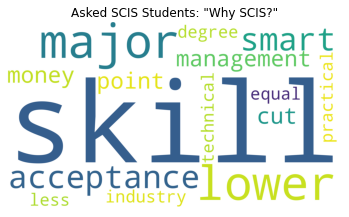

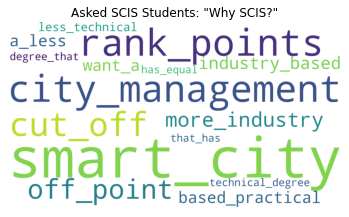

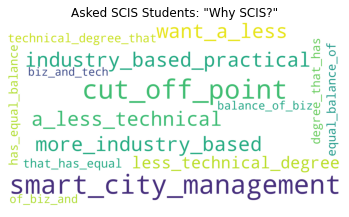

In [14]:
# Why SCIS over the other Unis or Schools?

why_scis = oe_qn.iloc[:, [0]]
#why_scis.head()

sw = original_stopwords()
sw.extend(['seemed', 'want', 'smu', 'based', 'city'
          ,'rank', 'points', 'lol', 'bro', 'cmi', 'hahah'])

sentences = extract_text(why_scis)

single_word = token_fn(sentences, 1, sw)
double_word = token_fn(sentences, 2, sw)
triple_word = token_fn(sentences, 3, sw)

wc_fn(single_word, 'Asked SCIS Students: "Why SCIS?"', 15)
wc_fn(double_word, 'Asked SCIS Students: "Why SCIS?"', 15)
wc_fn(triple_word, 'Asked SCIS Students: "Why SCIS?"', 15)

#stylecloud
sc_words = " ".join([w.upper() for w in single_word])
sc_words_2 = " ".join([w.upper() for w in double_word])
sc_words_3 = " ".join([w.upper() for w in triple_word])

stylecloud.gen_stylecloud(sc_words,
                          icon_name = 'fas fa-question',
                          palette ='cartocolors.qualitative.Bold_8',
                          background_color = 'white',
                          output_name ='why_scis_single.png',
                          collocations = False,
                          custom_stopwords = sw)

stylecloud.gen_stylecloud(sc_words_2,
                          icon_name = 'fas fa-question',
                          palette ='cartocolors.qualitative.Bold_8',
                          background_color = 'white',
                          output_name ='why_scis_double.png',
                          collocations = False,
                          custom_stopwords = sw)

stylecloud.gen_stylecloud(sc_words_3,
                          icon_name = 'fas fa-question',
                          palette ='cartocolors.qualitative.Bold_8',
                          background_color = 'white',
                          output_name ='why_scis_triple.png',
                          collocations = False,
                          custom_stopwords = sw)
                          
### References ###
## icon_name: https://fontawesome.com/
## palette: https://jiffyclub.github.io/palettable/cartocolors/qualitative/


# From single word WC: Probably related to the skills / majors that are offered SCIS
# From double & triple word WC: SCIS offers industry-based and practical skills, Less technical or more-friendly degrees
## as well as smart-city management

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


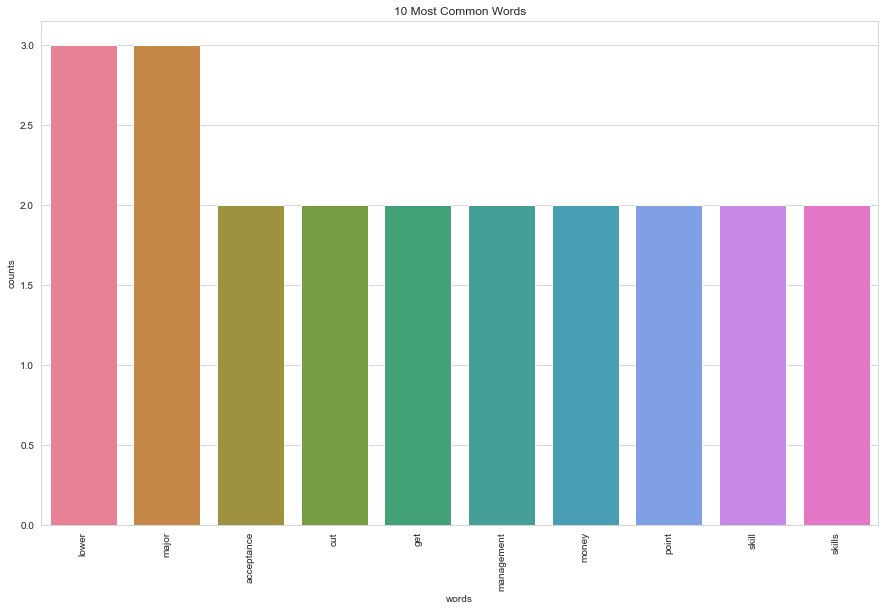

In [15]:
# Common words used
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=sw)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    why_scis['Why SCIS over other schools']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [16]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 8

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# From LDA: 
## Seems that SCIS is deemed as a 'lower barrier to entry'
## Encourages In-Class Discussions
## Less Technical, Easier to Learn

Topics found via LDA:

Topic #0:
skill classmates students discussion class speak teaches think

Topic #1:
acceptance well like went best choice one options

Topic #2:
major management smart skills technology soft better focus

Topic #3:
money get lesson seminar style improve presentation coolness

Topic #4:
lower point cut able make others distance curriculum


## SCIS Students: Previous Education / School

In [17]:
# SCIS Students - What was their previous education/school? 

prev_school =  noe_qn.iloc[:, [2, 3, 4, 5, 6, 7, 8]]
prev_school.drop(prev_school.index[prev_school['Are you from the School of Computing and Information Systems (SCIS)?'] == 'No'], inplace = True)
#prev_school.shape
prev_school_dist = prev_school.groupby(prev_school['Where were you studying at before coming into SMU?'])
prev_school_dist.size()

# Majority of our SCIS Student Respondents came from Polytechnic before entering SMU, followed by JCs.
## Outliers are 1 from MI and 1 from 'High school' to be found out later below

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Where were you studying at before coming into SMU?
High school            1
Junior College        11
Millenia Institute     1
Polytechnic           16
dtype: int64

## SCIS Students from Polytechnic

In [18]:
# SCIS Students - From Poly
is_poly = prev_school['Where were you studying at before coming into SMU?'] == 'Polytechnic'
prev_school_poly = prev_school[is_poly]
prev_school_poly = prev_school_poly[["Which Polytechnic are you from?","What was the diploma / course you are studying/have studied?"]]
#prev_school_poly.head()

prev_school_poly_dist = prev_school_poly.groupby(prev_school_poly['Which Polytechnic are you from?'])
prev_school_poly_dist.size()

# Majority of our SCIS Student Respondents who are from Polytechnic came from Temasek Polytechnic before entering SMU
## All 5 Singapore Polytechnics are present here

Which Polytechnic are you from?
Nanyang Polytechnic      2
Ngee Ann Polytechnic     3
Republic Polytechnic     1
Singapore Polytechnic    2
Temasek Polytechnic      8
dtype: int64

In [19]:
# SCIS Students - From Poly - Diplomas
prev_school_poly_dip_dist = prev_school_poly.groupby(prev_school_poly['What was the diploma / course you are studying/have studied?'])
prev_school_poly_dip_dist.size()

What was the diploma / course you are studying/have studied?
Accountancy                                    1
Biomedical Engineering                         1
Business Information Systems                   1
Business Information Technology                1
Business Studies                               1
Computer Engineering                           1
Engineering Informatics                        1
Financial Business Informatics                 1
Hospitality and Tourism Management             1
Integrated Events and Project Management       1
International Business and Entrepreneurship    1
Logistics & Operations Management              2
Maritime Business                              1
Mechatronics Engineering                       1
Network Systems and Security                   1
dtype: int64

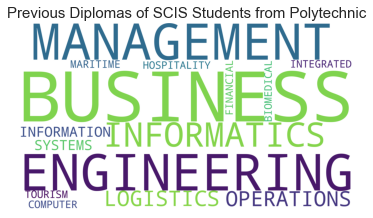

In [20]:
diplomas = [entry.upper() for entry in prev_school_poly['What was the diploma / course you are studying/have studied?']]
wc_fn(diplomas, 'Previous Diplomas of SCIS Students from Polytechnic', 15)

# Seems that most of the poly diplomas of our respndents are mainly to do with Business and Engineering. 
## There are some IT-related ones like 'Informatics'.

In [21]:
# Could there be a certain diploma in TP related to IT that could be advantageous for the student in SCIS?
is_TP = prev_school_poly['Which Polytechnic are you from?'] == 'Temasek Polytechnic'
prev_school_temasek_poly = prev_school_poly[is_TP]
#prev_school_temasek_poly.head()

prev_school_temasek_poly_dip_dist = prev_school_temasek_poly.groupby(prev_school_temasek_poly['What was the diploma / course you are studying/have studied?'])
prev_school_temasek_poly_dip_dist.size()

## Possibly related to IT will be BIT, Com Engineering, FBI. 
## Sample size is fairly small to determine if there is a relation with regards to the Diploma
## School values, Culture, Common Friends?

What was the diploma / course you are studying/have studied?
Biomedical Engineering                         1
Business Information Technology                1
Computer Engineering                           1
Financial Business Informatics                 1
Hospitality and Tourism Management             1
International Business and Entrepreneurship    1
Logistics & Operations Management              2
dtype: int64

## SCIS Students from Junior College

In [22]:
# SCIS Students - From JC
is_JC = prev_school['Where were you studying at before coming into SMU?'] == 'Junior College'
prev_school_JC = prev_school[is_JC]
prev_school_JC = prev_school_JC[["Which Junior College are you from?","What was your subject combination in Junior College?"]]

prev_school_JC_dist = prev_school_JC.groupby(prev_school_JC['Which Junior College are you from?'])
prev_school_JC_dist.size()

# Quite a diverse number of JCs, in which this is before the JC Mergers back in 2019

Which Junior College are you from?
Catholic Junior College     2
Dunman High School          1
Hwa Chong Junior College    1
Pioneer Junior College      1
Raffles Junior College      1
Tampines Junior College     1
Temasek Junior College      2
Victoria Junior College     1
Yishun Junior college       1
dtype: int64

In [23]:
# SCIS Students - From JC - Subject Combinations
prev_school_poly_combi_dist = prev_school_JC.groupby(prev_school_JC['What was your subject combination in Junior College?'])
prev_school_poly_combi_dist.size()

# Majority took the combination of Physics, Chemistry, Mathematics and Economics (PCME)
# Following next will be Geography, Chemistry, Mathematics and Economics (GCME)
# CSE is China Studies in English

What was your subject combination in Junior College?
CMEP       1
GCME       2
GELM       1
MEH CSE    1
MEHC       1
PCME       5
dtype: int64

## University Rankings Based on IT

<AxesSubplot:title={'center':'First Place'}, xlabel='first_place'>

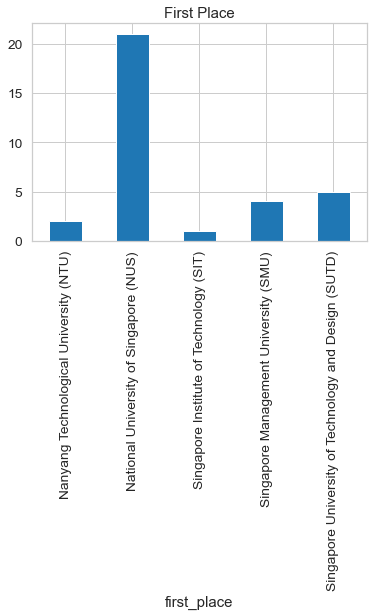

In [24]:
# Based on all respondents of survey
uni_rankings = pd.DataFrame(noe_qn['In terms of IT, rank the following according to their offerings of the best courses / opportunities / expertise in this sector.'])
uni_rankings = uni_rankings.join(oe_qn['Uni Ranking Elaboration'])

# uni_rankings.head()
rankings = []
first_place = []
second_place = []
third_place = []
last_place = []

for x in uni_rankings['In terms of IT, rank the following according to their offerings of the best courses / opportunities / expertise in this sector.']:
    rankings.append(x.split(', '))

for e in rankings:
    first_place.append(e[0])
    second_place.append(e[1])
    third_place.append(e[2])
    last_place.append(e[-1])
    
fp_df = pd.DataFrame(first_place, columns = ['first_place'])
first_place_dist = fp_df.groupby(fp_df['first_place'])
first_place_dist.size().plot(kind='bar', title = 'First Place')

# NUS has the most in first place

<AxesSubplot:title={'center':'Second Place'}, xlabel='second_place'>

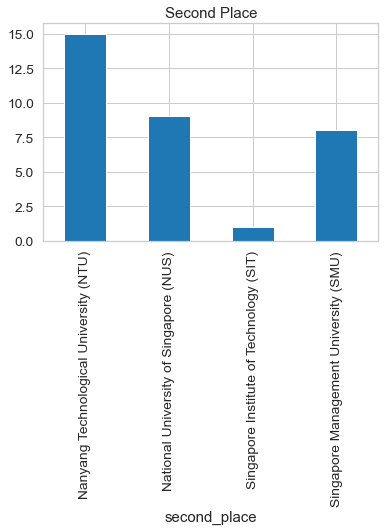

In [25]:
sp_df = pd.DataFrame(second_place, columns = ['second_place'])
second_place_dist = sp_df.groupby(sp_df['second_place'])
second_place_dist.size().plot(kind='bar', title = 'Second Place')

# Second place has NTU for the most, followed by NUS

<AxesSubplot:title={'center':'Third Place'}, xlabel='third_place'>

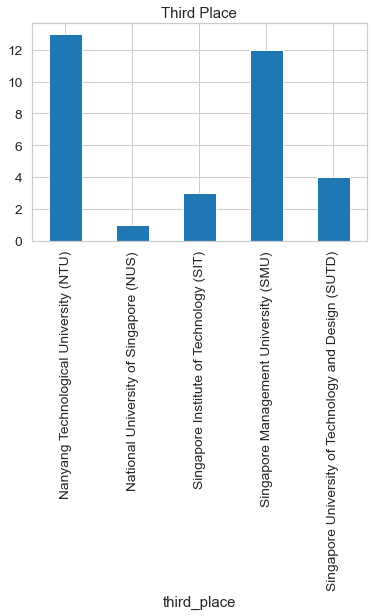

In [26]:
tp_df = pd.DataFrame(third_place, columns = ['third_place'])
third_place_dist = tp_df.groupby(tp_df['third_place'])
third_place_dist.size().plot(kind='bar', title = 'Third Place')

# Many people think that SMU would be the 3rd best university when it comes to IT, falling behind NUS and NTU

<AxesSubplot:title={'center':'Last Place'}, xlabel='last_place'>

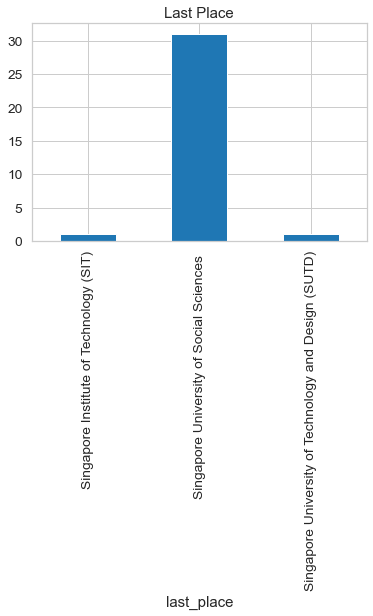

In [27]:
lp_df = pd.DataFrame(last_place, columns = ['last_place'])
last_place_dist = lp_df.groupby(lp_df['last_place'])
last_place_dist.size().plot(kind='bar', title = 'Last Place')

# SMU's SCIS offerings are renowned and well-liked enough not for it to be unfavourable in the rankings

## University Rankings Based on IT - Elaboration

In [28]:
## UNCOMMENT BELOW WHEN RESTARTING AND RUNNING KERNEL FROM SCRATCH
uni_rankings = uni_rankings.join(fp_df['first_place'])
uni_rankings = uni_rankings.join(sp_df['second_place'])
uni_rankings = uni_rankings.join(tp_df['third_place'])
uni_rankings = uni_rankings.join(lp_df['last_place'])

import pprint
pp = pprint.PrettyPrinter(indent=2)

# For those that put SMU First - Why?
is_smu_first = uni_rankings['first_place'] == "Singapore Management University (SMU)"
smu_is_first = uni_rankings[is_smu_first]
smu_is_first = smu_is_first[['Uni Ranking Elaboration', 'first_place']]
#smu_is_first.head()

why_first = []
for entry in smu_is_first['Uni Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_first.append(entry)
pp.pprint(why_first)

# Very little opinions, but will be because of smaller group seminars, and it is newer.
# The above are biased and not very useful

[ 'smu has smaller group seminars',
  'probably biased to smu  i felt that the newer universities have a better '
  'ranking than the more established ones',
  'i ranked based on the skills and knowledge acquired from each universities ',
  'based on my own opinion of each of the school ']


In [29]:
# For those that put SMU Second - Why?
is_smu_second = uni_rankings['second_place'] == "Singapore Management University (SMU)"
smu_is_second = uni_rankings[is_smu_second]
smu_is_second = smu_is_second[['Uni Ranking Elaboration', 'second_place']]

import pprint
pp = pprint.PrettyPrinter(indent=2)

why_second = []
for entry in smu_is_second['Uni Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_second.append(entry)
pp.pprint(why_second)

# SMU SCIS mimics real-life scenarios
# Estimated expected starting salary of each school

[ 'name   program',
  'top paying it graduates come from nus and then followed by smu and then '
  'ntu  the reason for sutd to be 4th is their expertise in cyber security  '
  'the remaining are just my assumptions  not actually sure about their '
  'ability to provide it programs ',
  'im not sure abt suss and sit  nus generally performs better overall because '
  'of its name and the competitiveness  ntu i didnt really hear much good '
  'things and i dont regret coming to smu  sutd is 4 because of the general '
  'courses they have to take in the first year  i wouldnt pay much interest '
  'since',
  'sutd has a more in depth syllabus while smu is less technical but mimics '
  'real life scenarios more  sit is also well known for it s it course but the '
  'trimester is too taxing on students  nus  syllabus is too academic based  '
  'there is a lack of application   ntu and suss are not known for their it '
  'courses',
  'dependent on the variety of choices',
  'i ranked based on

In [30]:
# For those that put SMU Third - Why?
is_smu_third = uni_rankings['third_place'] == "Singapore Management University (SMU)"
smu_is_third = uni_rankings[is_smu_third]
smu_is_third = smu_is_third[['Uni Ranking Elaboration', 'third_place']]

import pprint
pp = pprint.PrettyPrinter(indent=2)

why_third = []
for entry in smu_is_third['Uni Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_third.append(entry)
pp.pprint(why_third)

# NTU/NUS are more technically skilled
# SMU is more business?
# Big 3 = NUS, NTU, SMU have most prestigious computing programs

[ 'ntu and nus students are more technically skilled',
  'sutd has the most technical stuff according to word of mouth',
  'top 3 universities',
  'strong records and reputation',
  'the number of courses available',
  'aside from what is taught since opportunities is taken into consideration '
  'then naturally the schools reputation would play apart in providing '
  'students with better options and opportunities',
  'nus is known to have the best and established uni in singpaore the rest is '
  'just following suit their curicullum not developed and their experience is '
  'important in developing good programs',
  'in terms of technical skills  i believe nus and ntu are better  they teach '
  'concepts like linked list in their curriculum  that aside  smu has a lot of '
  'third party projects that put us ahead of the other schools ',
  'nus and ntu are more technical and challenging  while smu is more business  '
  'from the reputation of the universities  smu ranks higher than si

In [31]:
# For those that put NUS First - Why?
is_nus_first = uni_rankings['first_place'] == "National University of Singapore (NUS)"
nus_is_first = uni_rankings[is_nus_first]
nus_is_first = nus_is_first[['Uni Ranking Elaboration', 'first_place']]
nus_is_first.head()

import pprint
pp = pprint.PrettyPrinter(indent=2)

why_nus = []
for entry in nus_is_first['Uni Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_nus.append(entry)
pp.pprint(why_nus)

# Vigorous
# Mod Technicality, most Prestigious, Most Rigour, SMU's focus is not on technicality, but Biz Application
# Top-Paying Graduates -> Money is impt even without GES!
# SMU is more of a management school

[ 'name   program',
  'nus confirm first la so vigorous  ntu quite old sch but hv reputation  sutd '
  'heard is technically vigorous as well  more so than smu  sit and suss '
  'randomly assigned cos idk',
  'top 3 universities',
  'ranked based on mod technicality  nus ntu most prestigious and has the '
  'rigour and very technical  sit   sutd less technical but more than smu  smu '
  's focus is not on technicality but more on business application  suss is a '
  'self study uni',
  'top paying it graduates come from nus and then followed by smu and then '
  'ntu  the reason for sutd to be 4th is their expertise in cyber security  '
  'the remaining are just my assumptions  not actually sure about their '
  'ability to provide it programs ',
  'strong records and reputation',
  'the number of courses available',
  'aside from what is taught since opportunities is taken into consideration '
  'then naturally the schools reputation would play apart in providing '
  'students with bette

## University IT Course Rankings

<AxesSubplot:title={'center':'Course First Place'}, xlabel='c_first_place'>

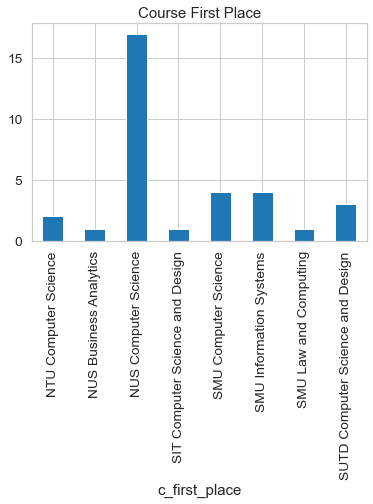

In [32]:
# Based on all respondents of survey, NOT REFERRING TO MAJOR
course_rankings = pd.DataFrame(noe_qn['Rank the following IT courses offered by the universities'])
course_rankings = course_rankings.join(oe_qn['Course Ranking Elaboration'])
#course_rankings.head()

# Which are the top 3 Courses in the Rankings?
c_rankings = []
c_first_place = []
c_second_place = []
c_third_place = []
c_last_place = []

for x in course_rankings['Rank the following IT courses offered by the universities']:
    c_rankings.append(x.split(', '))

for e in c_rankings:
    c_first_place.append(e[0])
    c_second_place.append(e[1])
    c_third_place.append(e[2])
    c_last_place.append(e[-1])
    
cfp_df = pd.DataFrame(c_first_place, columns = ['c_first_place'])
c_first_place_dist = cfp_df.groupby(cfp_df['c_first_place'])
c_first_place_dist.size().plot(kind='bar', title = 'Course First Place')

# NUS Computer Science is first place

<AxesSubplot:title={'center':'Course Second Place'}, xlabel='c_second_place'>

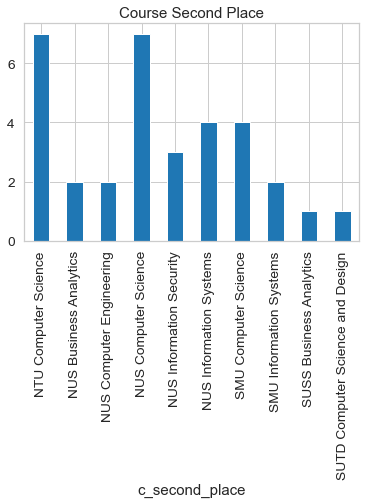

In [33]:
csp_df = pd.DataFrame(c_second_place, columns = ['c_second_place'])
c_second_place_dist = csp_df.groupby(csp_df['c_second_place'])
c_second_place_dist.size().plot(kind='bar', title = 'Course Second Place')

# NTU Com Science and NUS Com Science tie in second place for most of the respondents

<AxesSubplot:title={'center':'Course Third Place'}, xlabel='c_third_place'>

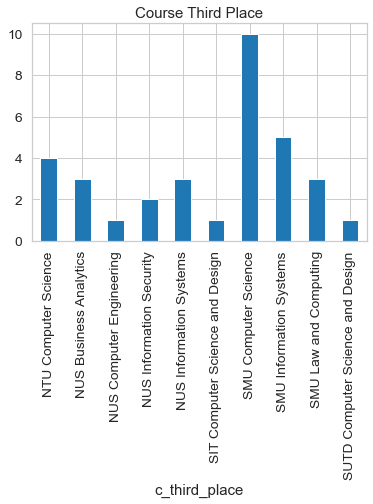

In [34]:
ctp_df = pd.DataFrame(c_third_place, columns = ['c_third_place'])
c_third_place_dist = ctp_df.groupby(ctp_df['c_third_place'])
c_third_place_dist.size().plot(kind='bar', title = 'Course Third Place')

# Most of our respondents think that the 3rd best course is SMU Com Science

<AxesSubplot:title={'center':'Course Last Place'}, xlabel='c_last_place'>

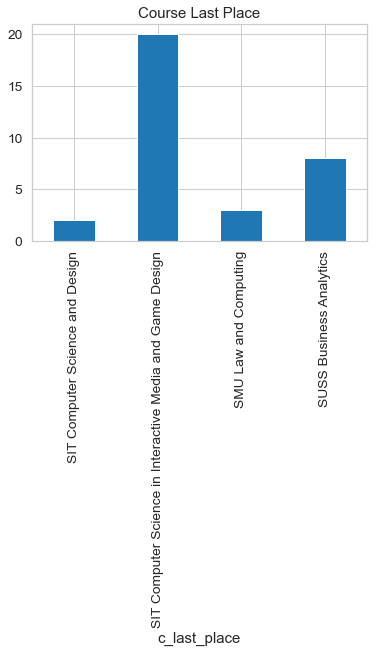

In [35]:
clp_df = pd.DataFrame(c_last_place, columns = ['c_last_place'])
c_last_place_dist = clp_df.groupby(clp_df['c_last_place'])
c_last_place_dist.size().plot(kind='bar', title = 'Course Last Place')

# SMU's Law and Computing were considered last place. It could be because it is new and is not validated or reviewed yet.

In [36]:
# Where are SMU's Courses usually at in the rankings?
searchfor = ['SMU Computer Science', 'SMU Information Systems', 'SMU Law and Computing']
course_rankings.head()

array = []
for x in course_rankings['Rank the following IT courses offered by the universities']:
    array.append(x.split(', '))
    
smu_degree = []
smu_rank = []

for e in array:
    for sch in e:
        if sch in searchfor:
            smu_degree.append(sch)
            smu_rank.append(e.index(sch) + 1)

smu_rank_df = pd.DataFrame({'SMU Degree':smu_degree, 'Ranking':smu_rank})
smu_rank_df.head()

# For each Degree, what is their average ranking across all the the unis? 
overall_ranking = smu_rank_df['Ranking'].mean()
print("SMU Courses Overall Ranking:", round(overall_ranking, 2)) 

# SMU's courses as a whole on average is near 5th place in terms of the course rankings. 5/13

SMU Courses Overall Ranking: 5.37


In [37]:
# What are the average rankings for each SMU course?

smu_rank_df_cs = smu_rank_df[smu_rank_df['SMU Degree'] == "SMU Computer Science"]
#smu_rank_df_cs.head()
cs_ranking = smu_rank_df_cs['Ranking'].mean()
print("CS Average Ranking:", round(cs_ranking, 2))

smu_rank_df_is = smu_rank_df[smu_rank_df['SMU Degree'] == "SMU Information Systems"]
#smu_rank_df_is.head()
is_ranking = smu_rank_df_is['Ranking'].mean()
print("IS Average Ranking:", round(is_ranking, 2))

smu_rank_df_law = smu_rank_df[smu_rank_df['SMU Degree'] == "SMU Law and Computing"]
#smu_rank_df_law.head()
law_ranking = smu_rank_df_law['Ranking'].mean()
print("Computing and Law Average Ranking:", round(law_ranking, 2))

# From our respondents, SMU's most prominent course would be Com Sci, ranking around 3 or 4th place among 13 given courses
# Followed by IS, ranking of close to 5th place
# CS and Law is the lowest at 7/13, possibly due to the course being newly launched in 2020

CS Average Ranking: 3.85
IS Average Ranking: 4.94
Computing and Law Average Ranking: 7.33


## University IT Course Rankings - Elaboration

In [38]:
## UNCOMMENT BELOW WHEN RESTARTING AND RUNNING KERNEL FROM SCRATCH
course_rankings = course_rankings.join(cfp_df['c_first_place'])
course_rankings = course_rankings.join(csp_df['c_second_place'])
course_rankings = course_rankings.join(ctp_df['c_third_place'])
course_rankings = course_rankings.join(clp_df['c_last_place'])
# course_rankings.head()

import pprint
pp = pprint.PrettyPrinter(indent=2)

# For those that put an SMU Course as First - Why?
is_smu_course_first = course_rankings['c_first_place'].str.contains("SMU")
smu_course_is_first = course_rankings[is_smu_course_first]
smu_course_is_first = smu_course_is_first[['Course Ranking Elaboration', 'c_first_place']]
#smu_course_is_first.head()

why_smu_first = []
for entry in smu_course_is_first['Course Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_smu_first.append(entry)
pp.pprint(why_smu_first)

# SMU Provides Out of Classroom Opportunities -> Industrial / Workforce real-life experiences
# Word of Mouth, what is heard

[ 'smu provides out of classroom opportunities',
  'erer',
  'based on which courses i have heard of before',
  'difficulty of the course',
  'based on what i feel and hear  word of mouth ',
  'based on interest',
  'ranking mostly by the school']


In [39]:
# For those that put an SMU Course as Second - Why?
is_smu_course_second = course_rankings['c_second_place'].str.contains("SMU")
smu_course_is_second = course_rankings[is_smu_course_second]
smu_course_is_second = smu_course_is_second[['Course Ranking Elaboration', 'c_second_place']]
#smu_course_is_second.head()

why_smu_second = []
for entry in smu_course_is_second['Course Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_smu_second.append(entry)
pp.pprint(why_smu_second)

# SMU Provides Out of Classroom Opportunities -> Industrial / Workforce real-life experiences
# NUS vs SMU's Com Sci: SMU's CS is fairly new, need maturity to compete 

[ 'rep and igp',
  'smu provides out of classroom opportunities',
  'erer',
  'the upper ranks generally are more well balanced with a wide range of '
  'applications and are well known while the lower ranks are more academic and '
  'less well known',
  'ranked nus comp sci as the top because its true  smu is over comp sci '
  'because it is still new and really needs maturity to compete with ntu smu '
  'sutd  i m not familiar with the other course offerings so i m ranking them '
  'based on impressions ']


In [40]:
# For those that put an SMU Course as Third - Why?
is_smu_course_third = course_rankings['c_third_place'].str.contains("SMU")
smu_course_is_third = course_rankings[is_smu_course_third]
smu_course_is_third = smu_course_is_third[['Course Ranking Elaboration', 'c_third_place']]
#smu_course_is_third.head()

why_smu_third = []
for entry in smu_course_is_third['Course Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_smu_third.append(entry)
pp.pprint(why_smu_third)

[ 'rep and igp',
  'smu provides out of classroom opportunities',
  'computer science is one of the more high paying jobs',
  'erer',
  'based on which courses i have heard of before',
  'computer science is the top course',
  'idk based on feels im not sure of all the courses listed as well',
  'the upper ranks generally are more well balanced with a wide range of '
  'applications and are well known while the lower ranks are more academic and '
  'less well known',
  'sutd courses looks interesting and nus cs ranked 4th in the world',
  'com sci is the best in terms of genereality while the rest seems too niche '
  'plus the prestige of  com sci  is too hard to pass up',
  'computer science comes first cause it s the most in depth course for '
  'programming  next come information systems  i m not sure of the relevance '
  'of the other courses such as computer engineering so can t comment  sit is '
  'rated lower just cause it s rather new  still need time to see how much '
  'their

In [41]:
# Why SMU Last?
is_smu_course_last = course_rankings['c_last_place'].str.contains("SMU")
smu_course_is_last = course_rankings[is_smu_course_last]
smu_course_is_last = smu_course_is_last[['Course Ranking Elaboration', 'c_last_place']]
smu_course_is_last.head()

why_smu_last = []
for entry in smu_course_is_last['Course Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_smu_last.append(entry)
pp.pprint(why_smu_last)

# Too little information to get any insights

[ 'i ranked based on the credibility of the courses  year the course was '
  'established and the universities ',
  'idk based on feels im not sure of all the courses listed as well']


In [42]:
# Why NUS Course First?
is_nus_course_first = course_rankings['c_first_place'].str.contains("NUS")
nus_course_is_first = course_rankings[is_nus_course_first]
nus_course_is_first = nus_course_is_first[['Course Ranking Elaboration', 'c_first_place']]
#nus_course_is_first.head()

why_nus_first = []
for entry in nus_course_is_first['Course Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_nus_first.append(entry)
pp.pprint(why_nus_first)

# Average Salary, Com Sci the best in generality
# Prestige of Com Sci, most in depth course
# Relevant the course in IT Industry

[ 'rep and igp',
  'by feel',
  'my own guess based on peer feedback  my own feeling  yolo bro',
  'the ranking is based on average salary  personal experience with the '
  'courses  and also stories heard from students taking those courses ',
  'computer science is the top course',
  'i guess its just the more talked about courses ',
  'i ranked based on the credibility of the courses  year the course was '
  'established and the universities ',
  'idk based on feels im not sure of all the courses listed as well',
  'sutd courses looks interesting and nus cs ranked 4th in the world',
  'com sci is the best in terms of genereality while the rest seems too niche '
  'plus the prestige of  com sci  is too hard to pass up',
  'computer science comes first cause it s the most in depth course for '
  'programming  next come information systems  i m not sure of the relevance '
  'of the other courses such as computer engineering so can t comment  sit is '
  'rated lower just cause it s rathe

In [43]:
# Why NTU Course Second?
is_ntu_course_second = course_rankings['c_second_place'].str.contains("NTU")
ntu_course_is_second = course_rankings[is_ntu_course_second]
ntu_course_is_second = ntu_course_is_second[['Course Ranking Elaboration', 'c_second_place']]
#ntu_course_is_second.head()

why_ntu_second = []
for entry in ntu_course_is_second['Course Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_ntu_second.append(entry)
pp.pprint(why_ntu_second)

# Not very relevant answers

[ 'my own guess based on peer feedback  my own feeling  yolo bro',
  'computer science is the top course',
  'com sci is the best in terms of genereality while the rest seems too niche '
  'plus the prestige of  com sci  is too hard to pass up',
  'computer science comes first cause it s the most in depth course for '
  'programming  next come information systems  i m not sure of the relevance '
  'of the other courses such as computer engineering so can t comment  sit is '
  'rated lower just cause it s rather new  still need time to see how much '
  'their students develop',
  'ranking mostly by the school',
  'how establish the course is and the prospect',
  'specifics are better than general courses']


In [44]:
# Why NUS Course Second?
is_nus_course_second = course_rankings['c_second_place'].str.contains("NUS")
nus_course_is_second = course_rankings[is_nus_course_second]
nus_course_is_second = nus_course_is_second[['Course Ranking Elaboration', 'c_second_place']]
#nus_course_is_second.head()

why_nus_second = []
for entry in nus_course_is_second['Course Ranking Elaboration']:
    if len(entry.strip()) > 0:
        why_nus_second.append(entry)
pp.pprint(why_nus_second)

# SMU considered 'Big 3' Unis? -> 
## https://www.reddit.com/r/SGExams/comments/nmnwgs/uni_what_separates_the_big_3_unis_from_the_rest/
# Com Sci -> high paying jobs -> money is a factor 

[ 'by feel',
  'computer science is one of the more high paying jobs',
  'the ranking is based on average salary  personal experience with the '
  'courses  and also stories heard from students taking those courses ',
  'difficulty of the course',
  'i guess its just the more talked about courses ',
  'prospects and advancement',
  'i ranked based on the credibility of the courses  year the course was '
  'established and the universities ',
  'idk based on feels im not sure of all the courses listed as well',
  'based on what i feel and hear  word of mouth ',
  'based on interest',
  'based on how general or relevant the course might be in the it industry  '
  'the course that is suitable for the most jobs ',
  'nus and ntu are more technical and challenging  while smu is more business  '
  'from the reputation of the universities  smu ranks higher than sit even '
  'though sit is more techincal',
  'same as earlier',
  'big 3 uni computing programs are better']


## 3 Words that Describes SCIS

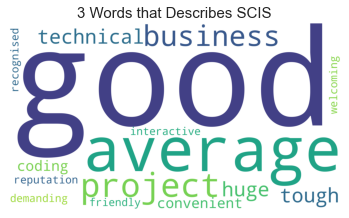

In [45]:
three_words = oe_qn['3 words that come into your mind together with SMU SCIS']

import re

words = []
for ans in three_words:
    words.append(re.findall(r'\w+', ans))

word_list = []
for e in words:
    for word in e:
        if len(word) >= 2:
            word_list.append(word)

wc_fn(word_list, '3 Words that Describes SCIS', 15)

# business, project relates to nature of SCIS being a more 'business centric school' and project application based
# Good, average and coding friendly - > what is good? what is average? but overall impression is that it is not bad

In [46]:
#stylecloud
sw = original_stopwords()
three_words_sc = " ".join([w.upper() for w in word_list])
stylecloud.gen_stylecloud(three_words_sc,
                          icon_name = 'fas fa-comment',
                          palette ='cartocolors.qualitative.Safe_8',
                          background_color = 'white',
                          output_name ='three_words.png',
                          collocations = False,
                          custom_stopwords = sw)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


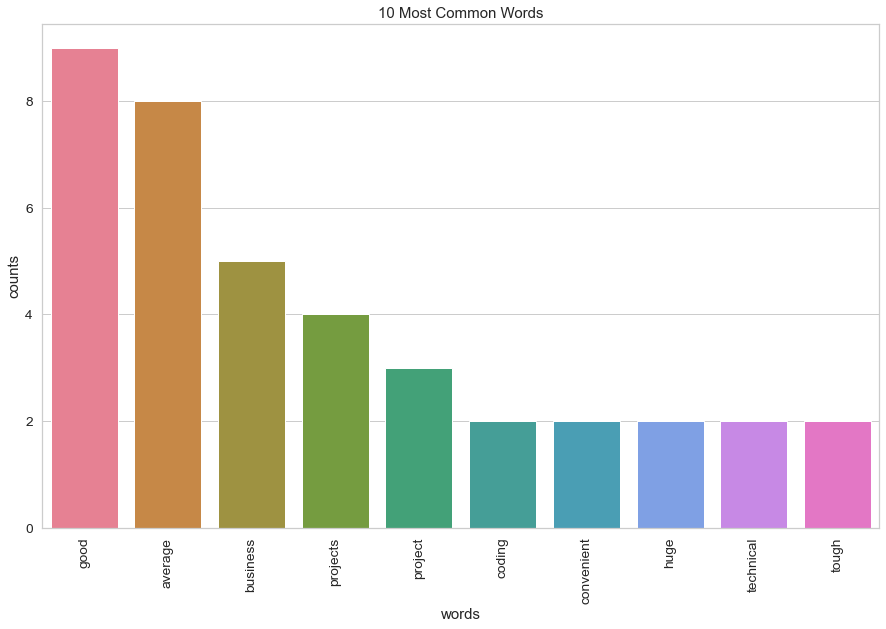

In [47]:
# Common words used
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=sw)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    oe_qn['3 words that come into your mind together with SMU SCIS']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# with WC: business and projects come before coding in terms of tech
# With most of our res being from SCIS: suggests that SCIS more well-known for biz applications and projects over IT technicality

In [48]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 8

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
good fantastic practical professional interactive welcoming smart average

Topic #1:
average technical business huge non theory difficult death

Topic #2:
project tough convenient coding growing normal friendly programming

Topic #3:
business good new okay decent great tiring diverse

Topic #4:
projects good yellow systems science information computer expensive


## Factors for Choice of University

<AxesSubplot:title={'center':'First Factor'}, xlabel='first_factor'>

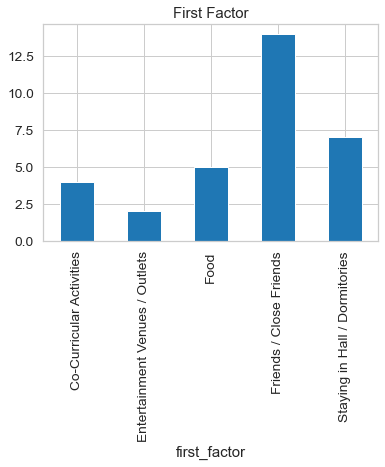

In [49]:
choices = pd.DataFrame(noe_qn['How important are these factors to you in deciding the choice of university or tertiary education?'])
choices = choices.join(oe_qn['Factors for Uni Choice'])

factors = []
first_factor = []
second_factor = []
third_factor = []
fourth_factor = []
last_factor = []

choices = choices.drop(choices.index[choices['How important are these factors to you in deciding the choice of university or tertiary education?'].isnull()])

for x in choices['How important are these factors to you in deciding the choice of university or tertiary education?']:
    factors.append(x.split(', '))

for e in factors:
    first_factor.append(e[0])
    second_factor.append(e[1])
    third_factor.append(e[2])
    fourth_factor.append(e[3])
    last_factor.append(e[-1])
    
ff_df = pd.DataFrame(first_factor, columns = ['first_factor'])
first_factor_dist = ff_df.groupby(ff_df['first_factor'])
first_factor_dist.size().plot(kind='bar', title = 'First Factor')

# Friends / Close Friends who are applying to the University was ranked the top factor the most

<AxesSubplot:title={'center':'Second Factor'}, xlabel='second_factor'>

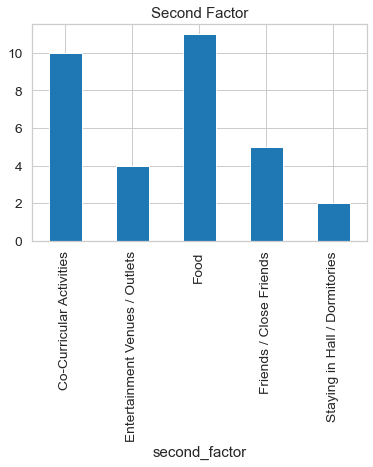

In [50]:
sf_df = pd.DataFrame(second_factor, columns = ['second_factor'])
second_factor_dist = sf_df.groupby(sf_df['second_factor'])
second_factor_dist.size().plot(kind='bar', title = 'Second Factor')

# Food and CCA are ranked the highest in terms of the 2nd most important factor for choice of universities

<AxesSubplot:title={'center':'Third Factor'}, xlabel='third_factor'>

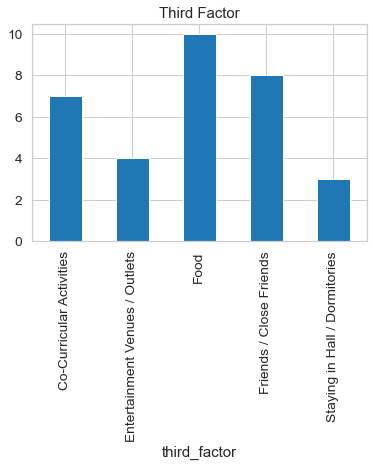

In [51]:
tf_df = pd.DataFrame(third_factor, columns = ['third_factor'])
third_factor_dist = tf_df.groupby(tf_df['third_factor'])
third_factor_dist.size().plot(kind='bar', title = 'Third Factor')

# The factor that is usually in 3rd place will be food, followed by close friends and CCAs

<AxesSubplot:title={'center':'Last Factor'}, xlabel='last_factor'>

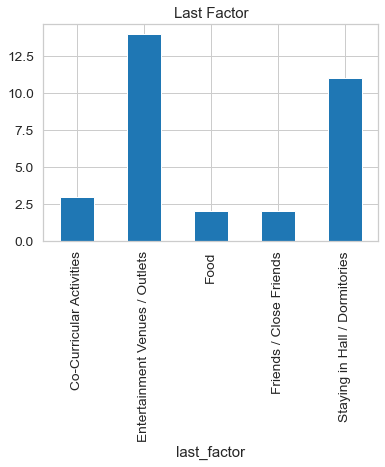

In [52]:
lf_df = pd.DataFrame(last_factor, columns = ['last_factor'])
last_factor_dist = lf_df.groupby(lf_df['last_factor'])
last_factor_dist.size().plot(kind='bar', title = 'Last Factor')

# Entertainment seems to be the least considered factor

## Factors for Choice of University - Elaboration

In [53]:
## UNCOMMENT BELOW WHEN RESTARTING AND RUNNING KERNEL FROM SCRATCH
choices = choices.join(ff_df['first_factor'])
choices = choices.join(sf_df['second_factor'])
choices = choices.join(tf_df['third_factor'])
choices = choices.join(lf_df['last_factor'])

import pprint
pp = pprint.PrettyPrinter(indent=2)

# Why Friends First?
is_friends_first = choices['first_factor'].str.contains("Friends / Close Friends")
is_friends_first.fillna(False, inplace = True)

friends_is_first = choices[is_friends_first]
friends_is_first = friends_is_first[['Factors for Uni Choice', 'first_factor']]

why_friends_first = []
for entry in friends_is_first['Factors for Uni Choice']:
    if len(entry.strip()) > 0:
        why_friends_first.append(entry)
pp.pprint(why_friends_first)

[ 'got rome q  no rome q no sch',
  'enjoy working with friends',
  'cca for holistic education  the rest no point tbh',
  'hall life is very important',
  'since i m a vegetarian i need to ensure that there s food places that i can '
  'go to as i won t be sure how much time i ll need to spend in school at any '
  'point in time so i need to be able to settle my meals if necessary',
  'i ranked based on my personal preferences ',
  'i like that smu is in town  got more food options',
  'good to have friends so that we can meet or even bid for the same classes ',
  'friends are the most important because idw to hang out with snakes like the '
  'ones in smu',
  'food cause food  the rest not really essential  but would be nice to have ',
  'friends is the most important as everything is more fun with friends']


In [54]:
# Why CCA Second?
is_cca_second = choices['second_factor'].str.contains("Co-Curricular Activities")
is_cca_second.fillna(False, inplace = True)

cca_is_second = choices[is_cca_second]
cca_is_second = cca_is_second[['Factors for Uni Choice', 'second_factor']]

why_cca_second = []
for entry in cca_is_second['Factors for Uni Choice']:
    if len(entry.strip()) > 0:
        why_cca_second.append(entry)
pp.pprint(why_cca_second)

# Not so much useful insights

[ 'dont want to stay in hall and interact as socialising will deplete my '
  'energy  the rest are not so impt at all as i looked into the what modules '
  'the course has to offer',
  'ert',
  'friends are the people who will determine a student s school experience so '
  'i feel that s of priority and then food is also crucial since that s a huge '
  'part of school life  then the rest are just based on my interest ',
  'based on what i like ',
  'hall life is a irreplaceable experience',
  'food has to be the top ']


In [55]:
# Why Food Second?
is_food_second = choices['second_factor'].str.contains("Food")
is_food_second.fillna(False, inplace = True)

food_is_second = choices[is_food_second]
food_is_second = food_is_second[['Factors for Uni Choice', 'second_factor']]

why_food_second = []
for entry in food_is_second['Factors for Uni Choice']:
    if len(entry.strip()) > 0:
        why_food_second.append(entry)
pp.pprint(why_food_second)

# Not so much useful input

[ 'enjoy working with friends',
  'i dont want to keep travelling',
  'cca for holistic education  the rest no point tbh',
  'hall life is very important',
  'since i m a vegetarian i need to ensure that there s food places that i can '
  'go to as i won t be sure how much time i ll need to spend in school at any '
  'point in time so i need to be able to settle my meals if necessary',
  'i ranked based on my personal preferences ',
  'i want to study with friends especially hard to make friends in covid times',
  'i like that smu is in town  got more food options',
  'friends are the most important because idw to hang out with snakes like the '
  'ones in smu']


## GES Ranking Changes

In [56]:
GES_rankings = pd.DataFrame(noe_qn['Rank the following IT courses offered by the universities'])
GES_rankings = GES_rankings.join(noe_qn['After looking at the GES, rank the following IT courses offered by the universities'])
GES_rankings = GES_rankings.join(noe_qn.iloc[:, [13]])
GES_rankings = GES_rankings.join(oe_qn['Course Ranking Elaboration after GES'])

GES_rankings = GES_rankings.dropna(axis = 0)

GES_rankings.head()

,Rank the following IT courses offered by the universities,"After looking at the GES, rank the following IT courses offered by the universities",Were there any changes in your rankings after looking at the GES?,Course Ranking Elaboration after GES
1,"NUS Computer Science, SMU Computer Science, SM...","SMU Computer Science, SMU Information Systems,...",Yes,
2,"NUS Computer Science, NUS Information Security...","NUS Computer Science, NUS Information Security...",Yes,
3,"SMU Information Systems, SMU Computer Science,...","SMU Information Systems, SMU Computer Science,...",No,
4,"SMU Information Systems, SMU Computer Science,...","SMU Information Systems, SMU Computer Science,...",No,ges only acts as a form of reference
5,"SUTD Computer Science and Design, NUS Computer...","NUS Information Security, SMU Computer Science...",Yes,money is important


<AxesSubplot:title={'center':'GES - First Place'}, xlabel='g_first_place'>

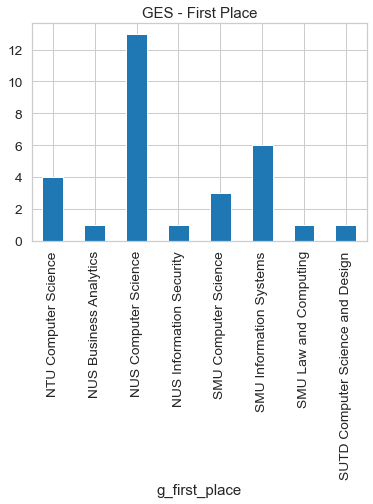

In [57]:
# Based on all respondents of survey

# uni_rankings.head()
g_rankings = []
g_first_place = []
g_second_place = []
g_third_place = []
g_last_place = []

for x in GES_rankings['After looking at the GES, rank the following IT courses offered by the universities']:
    g_rankings.append(x.split(', '))

for e in g_rankings:
    g_first_place.append(e[0])
    g_second_place.append(e[1])
    g_third_place.append(e[2])
    g_last_place.append(e[-1])
    
gfp_df = pd.DataFrame(g_first_place, columns = ['g_first_place'])
g_first_place_dist = gfp_df.groupby(gfp_df['g_first_place'])
g_first_place_dist.size().plot(kind='bar', title = 'GES - First Place')

# NUS Com Science still takes first place even after the GES

<AxesSubplot:title={'center':'GES - Second Place'}, xlabel='g_second_place'>

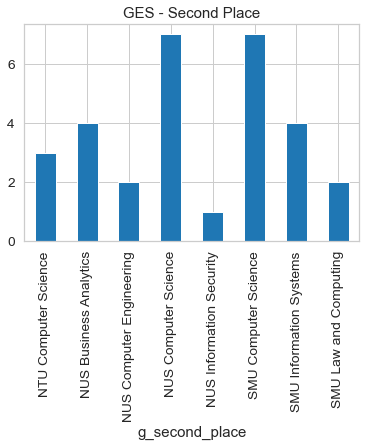

In [58]:
gsp_df = pd.DataFrame(g_second_place, columns = ['g_second_place'])
g_second_place_dist = gsp_df.groupby(gsp_df['g_second_place'])
g_second_place_dist.size().plot(kind='bar', title = 'GES - Second Place')

# NUS Com Sci and SMU Com Sci ranked mostly 2nd place

<AxesSubplot:title={'center':'GES - Third Place'}, xlabel='g_third_place'>

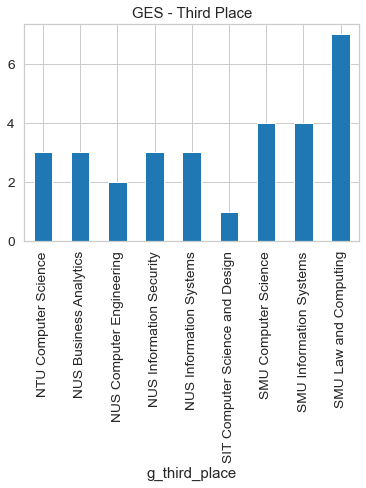

In [59]:
gtp_df = pd.DataFrame(g_third_place, columns = ['g_third_place'])
g_third_place_dist = gtp_df.groupby(gtp_df['g_third_place'])
g_third_place_dist.size().plot(kind='bar', title = 'GES - Third Place')

# SMU Law and Computing is in 3rd place apparently

## GES Ranking Change Elaboration for Yes / No

In [60]:
ans_dist = GES_rankings.groupby(GES_rankings['Were there any changes in your rankings after looking at the GES? '])
ans_dist.size()
#.plot(kind='bar', title = 'Yes / No for GES Change Distribution')

# Most of our respondents had a change in their rankings after looking at the GES.
# Is approximated salary very important?

Were there any changes in your rankings after looking at the GES? 
No     11
Yes    19
dtype: int64

In [61]:
# For those who said yes: Why?
is_yes = GES_rankings['Were there any changes in your rankings after looking at the GES? '] == "Yes"
GES_yes = GES_rankings[is_yes]
GES_yes = GES_yes[['Were there any changes in your rankings after looking at the GES? ', 'Course Ranking Elaboration after GES']]

why_yes = []
for entry in GES_yes['Course Ranking Elaboration after GES']:
    if len(entry.strip()) > 0:
        why_yes.append(entry)
pp.pprint(why_yes)

# Prospective salary plays a part, show money?

[ 'money is important',
  'more pay',
  'seems like the top 3 unis really do have an edge',
  'slight change after viewing ges  but i dont think salary is everything  '
  'ultimately school   faculty support  school resources and curriculum will '
  'help a student flourish  its up to the student how much he she wants to use '
  'the support to improve  you can be from a shit school but still do well if '
  'you can optimally utilize the resources you re given ',
  'the article on the salary changed how i see some of the courses ',
  'didn t know that business analytics in nus ranked so high',
  'most likely to get more salary',
  'i just followed the ranking based on the ges',
  'not much difference because these indicators do not mean much  more of what '
  'the individual want to get out of the course',
  'the prospects of the course matters too  this is my ranking when i weigh '
  'the prospects along with the skill sets learnt in each course',
  'affected by the pay range',
  'mai

In [62]:
# For those who said no: Why?
is_no = GES_rankings['Were there any changes in your rankings after looking at the GES? '] == "No"
GES_no = GES_rankings[is_no]
GES_no = GES_no[['Were there any changes in your rankings after looking at the GES? ', 'Course Ranking Elaboration after GES']]

why_no = []
for entry in GES_no['Course Ranking Elaboration after GES']:
    if len(entry.strip()) > 0:
        why_no.append(entry)
pp.pprint(why_no)

# Aware of form of reference, money is not the best indicator

[ 'ges only acts as a form of reference',
  'smu has the highest pay because of fake data and overinflated numbers '
  'further more smu have lesser population size and usually inhabited by rich '
  'people so their jobs is usually through connections',
  'interest is priority',
  'salary is quite subjective unless we are talking about a normalised curve  '
  'the survey is based on the top 25  of the cohort  which realistically '
  'speaking those not apply to the majority',
  'same as the first',
  'i feel money is not the best indicator of how good a program is',
  'no difference']


## Programmes Joined Before / Know of

In [63]:
joined_before = []
for entry in oe_qn['What is/are the programme(s)?']:
    if len(entry.strip()) > 0:
        joined_before.append(entry)
pp.pprint(joined_before)

# MITB, Info Sessions, Tech Series, Workshops, Major Talk, ExploreSis, Project Experience Talk

[ 'mitb',
  'pre uni exposure workshops by scis',
  'forgot sorry  ',
  'virtual information session',
  'ellipsis data management  tech series and workshops',
  'smu mitb info session',
  'smt major talk  exploresis  metamorphosis  is project experience talk',
  'smu mitb',
  'networking session  competition',
  'hackathon',
  'introduction to react workshop',
  'smu mitb virtual information session  singapore ',
  'have but forgot',
  'sis day',
  'exploresis',
  'is degree info session',
  'workshops',
  'smu scis info session']


## Programmes Demanded

In [64]:
demanded = []

for entry in oe_qn['In this case, what kind of programmes would you want to participate in or hope to see more of?']:
    if len(entry.strip()) > 0:
        demanded.append(entry)
pp.pprint(demanded)

# feedbacks and changes to degrees
# Intro Lessons to Programming for those who want to Join Industry
# Career Paths / Job Opps
# More Industry Sharing Speakers

[ 'recommendation',
  'treer',
  'townhalls about feedback and changes to degree',
  'maybe some introductory lessons to programming for students who might be '
  'interested to join the industry',
  'i m not sure if i ve attended any perhaps i might have',
  'not interested',
  'career path',
  'more industry sharing speakers',
  'what job opportunities  or how it may help with getting work post '
  'graduation can come from taking the course']


## Mediums that People Will Use To Find Out about Things

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['flyers', 'physical', 'word'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


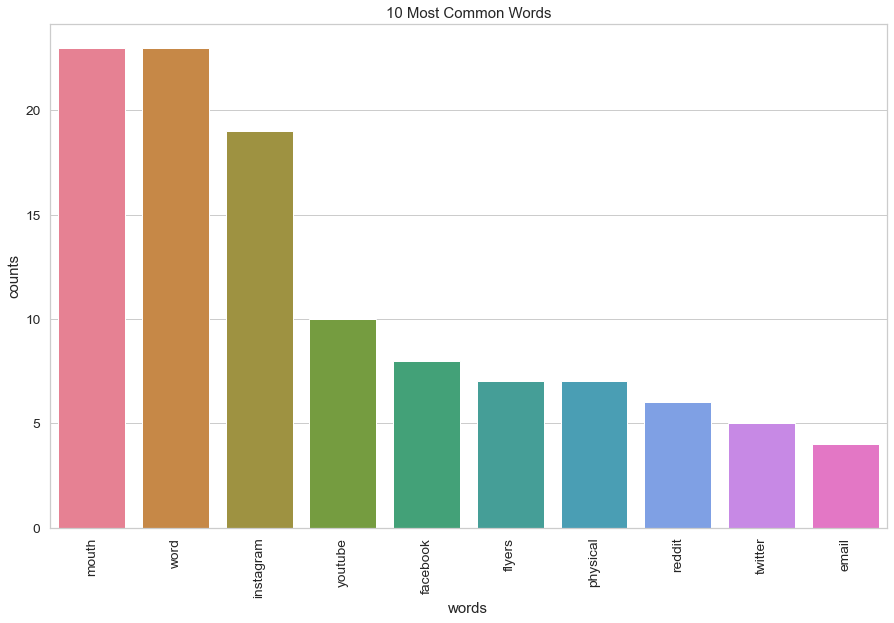

In [65]:
noe_qn['What will you use to find out more about or critique such programmes?']

sw = original_stopwords();
sw.extend(['word, physical', 'physical flyers', 'Physical Flyers'])

# Common words used
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=sw)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(
    noe_qn['What will you use to find out more about or critique such programmes?']
)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# First will be WOM, then Instagram, YT, Facebook, Flyers, Reddit and Twitter and email not so much